In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os
import pandas as pd
import numpy as np
import os
import pybedtools
import warnings
warnings.filterwarnings("ignore")
from collections import defaultdict

In [2]:
unfiltered_input = '/home/rmarina/projects/apobec/reproducibility_IDR/IDR_all/unfiltered/IDR_outputs/'
conf05_input = '/home/rmarina/projects/apobec/reproducibility_IDR/IDR_all/conf05/IDR_outputs/'
conf09_input = '/home/rmarina/projects/apobec/reproducibility_IDR/IDR_all/conf09/IDR_outputs/'
output_dir = '/home/rmarina/projects/apobec/reproducibility_IDR/IDR_all/plotting/'

In [5]:
tia1_samples = glob.glob(os.path.join(unfiltered_input, 'Tia1*.tsv'))

In [37]:
sample_dict = {}

sample_dict['Tia1_0ng'] = 'Tia1_0ng_'
sample_dict['Tia1_50ng'] = 'Tia1_50ng_'
sample_dict['Tia1_1000ng'] = 'Tia1_1000ng_'

samples = {}

for k,v in sample_dict.items():
    samples[k] = sorted(glob.glob(os.path.join(unfiltered_input, '{}*.tsv'.format(v))))[0]

In [38]:
samples

{'Tia1_0ng': '/home/rmarina/projects/apobec/reproducibility_IDR/IDR_all/unfiltered/IDR_outputs/Tia1_0ng_1_0conf_merged_v_Tia1_0ng_2_0conf_merged_0_filter_IDR.tsv',
 'Tia1_50ng': '/home/rmarina/projects/apobec/reproducibility_IDR/IDR_all/unfiltered/IDR_outputs/Tia1_50ng_1_0conf_merged_v_Tia1_50ng_2_0conf_merged_0_filter_IDR.tsv',
 'Tia1_1000ng': '/home/rmarina/projects/apobec/reproducibility_IDR/IDR_all/unfiltered/IDR_outputs/Tia1_1000ng_1_0conf_merged_v_Tia1_1000ng_2_0conf_merged_0_filter_IDR.tsv'}

### Reading in and plotting TIA1 samples###

In [39]:
def return_idr_value(row):
    scaled_score = row['score']
    if scaled_score == 1000:
        return 0
    else: 
        scaled_score_new = scaled_score/-125
        return 2 ** scaled_score_new

In [40]:
names = ['chrom','start','end','name','score','strand','local','global','rep1start','rep1end','rep1editc','rep2start','rep2end','rep2editc']

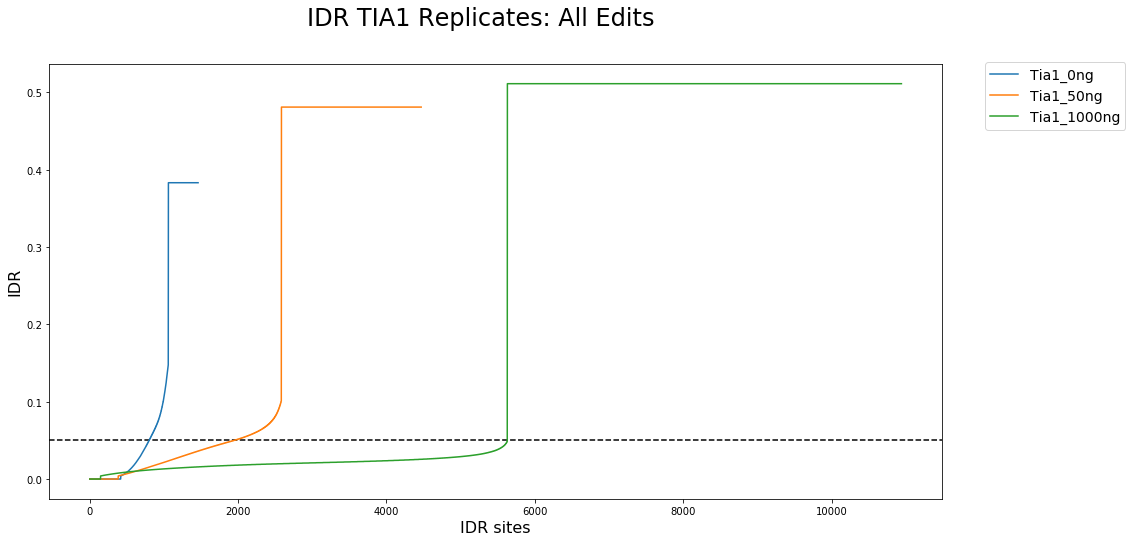

In [41]:
fig, ax = plt.subplots(figsize=(16, 8))
fig.suptitle('IDR TIA1 Replicates: All Edits', fontsize=24)
ax.axhline(0.05, ls='--', color='black')

for k,v in samples.items():
    
    
    idr = pd.read_csv(v, sep='\t', names=names)
    idr['IDR'] = idr.apply(return_idr_value, axis=1)
    
    ax.plot(np.arange(len(idr['IDR'])), np.sort(idr['IDR']), label=k)
    ax.legend(bbox_to_anchor=(1.04,1.02), loc="upper left", fontsize=14)

plt.xlabel('IDR sites', fontsize=16)
plt.ylabel('IDR', fontsize=16)
plt.savefig(output_dir + 'IDR_TIA1_unfiltered_samples.svg', dpi=300, bbox_inches='tight')

In [42]:
samples = {}

for k,v in sample_dict.items():
    samples[k] = sorted(glob.glob(os.path.join(conf05_input, '{}*.tsv'.format(v))))[0]

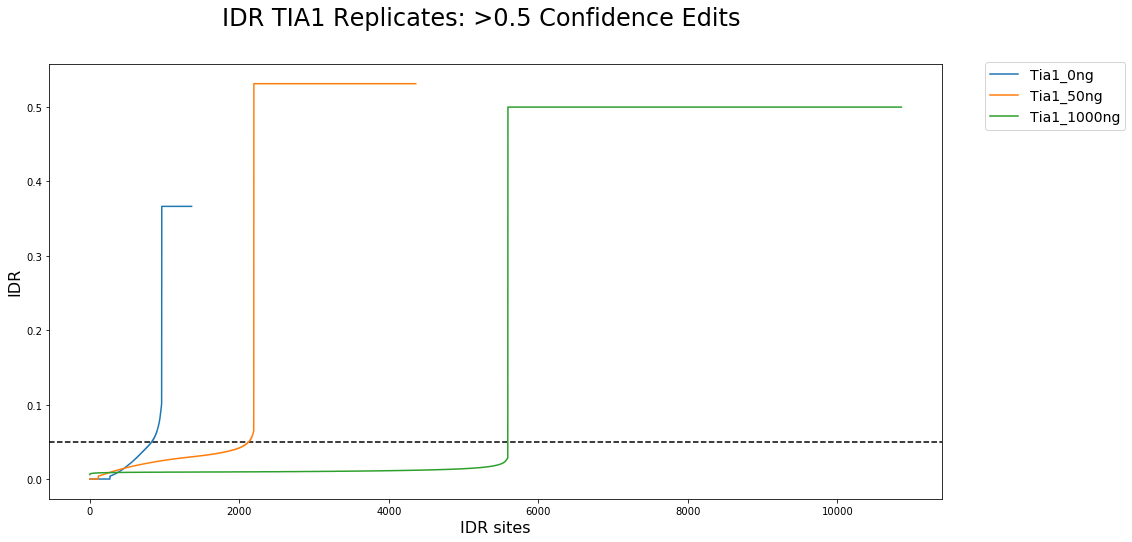

In [44]:
fig, ax = plt.subplots(figsize=(16, 8))
fig.suptitle('IDR TIA1 Replicates: >0.5 Confidence Edits', fontsize=24)
ax.axhline(0.05, ls='--', color='black')

for k,v in samples.items():
    
    
    idr = pd.read_csv(v, sep='\t', names=names)
    idr['IDR'] = idr.apply(return_idr_value, axis=1)
    
    ax.plot(np.arange(len(idr['IDR'])), np.sort(idr['IDR']), label=k)
    ax.legend(bbox_to_anchor=(1.04,1.02), loc="upper left", fontsize=14)

plt.xlabel('IDR sites', fontsize=16)
plt.ylabel('IDR', fontsize=16)
plt.savefig(output_dir + 'IDR_TIA1_conf05_samples.svg', dpi=300, bbox_inches='tight')

In [45]:
samples = {}

for k,v in sample_dict.items():
    samples[k] = sorted(glob.glob(os.path.join(conf09_input, '{}*.tsv'.format(v))))[0]

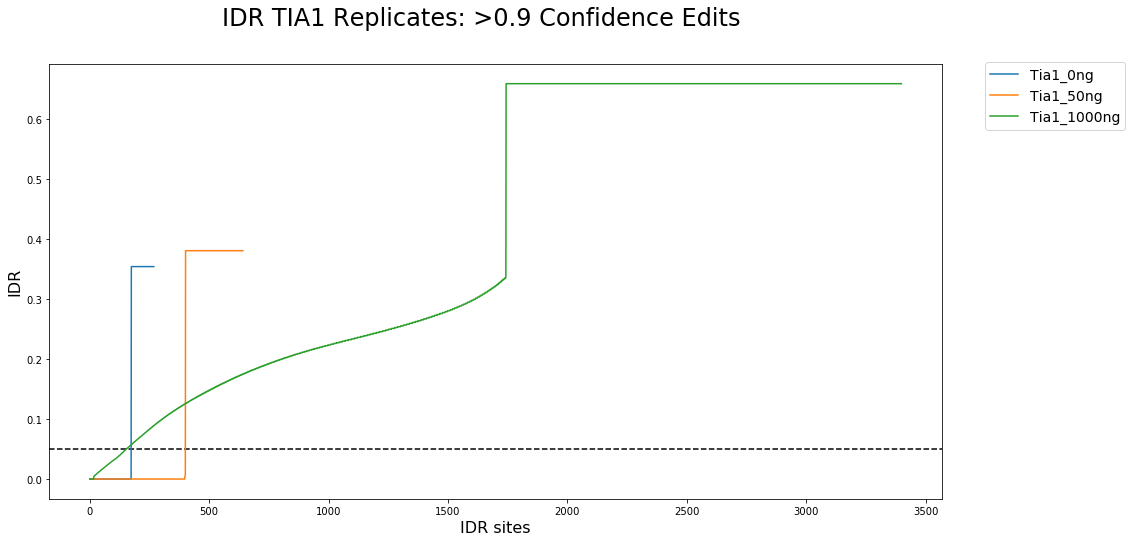

In [46]:
fig, ax = plt.subplots(figsize=(16, 8))
fig.suptitle('IDR TIA1 Replicates: >0.9 Confidence Edits', fontsize=24)
ax.axhline(0.05, ls='--', color='black')

for k,v in samples.items():
    
    
    idr = pd.read_csv(v, sep='\t', names=names)
    idr['IDR'] = idr.apply(return_idr_value, axis=1)
    
    ax.plot(np.arange(len(idr['IDR'])), np.sort(idr['IDR']), label=k)
    ax.legend(bbox_to_anchor=(1.04,1.02), loc="upper left", fontsize=14)

plt.xlabel('IDR sites', fontsize=16)
plt.ylabel('IDR', fontsize=16)
plt.savefig(output_dir + 'IDR_TIA1_conf09_samples.svg', dpi=300, bbox_inches='tight')